In [78]:
import pandas as pd
import os 
import math

In [79]:
path = "/Volumes/LM_MG_drive_one/Morel_meta_analyses_transcriptomics/gene_overlap_analysis_B6vsTC_Tn_Tfh/result_tab/"
list_files = os.listdir(path)

In [80]:
csv_files = [x for x in list_files if ".csv" in x and ".ipynb" and "merged" not in x]

In [81]:
csv_files

['result_TCvsB6_r2_Tfh.csv', 'result_Tn_B6vsTC_r2.csv']

In [82]:
labels = [x.split(".")[0].replace("result_","") for x in csv_files]
labels

['TCvsB6_r2_Tfh', 'Tn_B6vsTC_r2']

In [6]:
df_l = []
i = 0
for item in csv_files:
    temp = pd.read_csv(path + item)
    temp.columns = ['Unnamed: 0'] + [labels[i] + "_" + x for x in temp.columns[1:]] 
    i+=1
    df_l.append(temp)

In [7]:
[x.columns for x in df_l]

[Index(['Unnamed: 0', 'TCvsB6_r2_Tfh_baseMean', 'TCvsB6_r2_Tfh_log2FoldChange',
        'TCvsB6_r2_Tfh_lfcSE', 'TCvsB6_r2_Tfh_stat', 'TCvsB6_r2_Tfh_pvalue',
        'TCvsB6_r2_Tfh_padj'],
       dtype='object'),
 Index(['Unnamed: 0', 'Tn_B6vsTC_r2_baseMean', 'Tn_B6vsTC_r2_log2FoldChange',
        'Tn_B6vsTC_r2_lfcSE', 'Tn_B6vsTC_r2_stat', 'Tn_B6vsTC_r2_pvalue',
        'Tn_B6vsTC_r2_padj'],
       dtype='object')]

In [8]:
m_df = pd.DataFrame()
for x in df_l:
    if m_df.shape[0] ==0:
        m_df = x
    else:
        m_df = pd.merge(m_df,x,on ='Unnamed: 0')

In [9]:
m_df.to_csv("merged_res_df.csv",index=False)

# 1st 2 gene lists

#### log2FC > 0 ; padj < 0.05

In [26]:
gene_dict = {}
res_l = []
i=0
for x in df_l:
    
    padj_n = [y for y in x.columns if "padj" in y]
    FC_n = [z for z in x.columns if "log2FoldChange" in z]
    gene_dict.update({"padj0.05_log2FC_h0" + labels[i]: x.loc[((x[padj_n[0]]<0.05) & (x[FC_n[0]]>0)),'Unnamed: 0'].tolist()})
    i = i+1

In [27]:
gene_dict.keys()

dict_keys(['padj0.05_log2FC_h0TCvsB6_r2_Tfh', 'padj0.05_log2FC_h0Tn_B6vsTC_r2'])

In [28]:
[str(k) + "  " +str(len(v)) for k,v in gene_dict.items()]

s = ""
for k,v in gene_dict.items():
        s +=  k + "\t"
        s += ("\t").join(v) + "\n"        

out = open('gene_lists_padj0.05_FChigher0.txt', 'w')
out.write(s)
out.close()

In [29]:
from matplotlib_venn import venn2, venn2_circles
import matplotlib.pyplot as plt

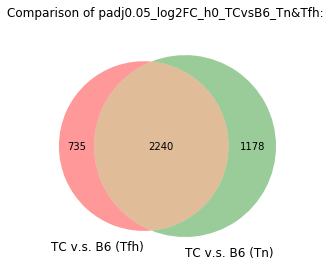

In [30]:
#Looking only in spleen
f = plt.figure()

venn2([set(gene_dict[list(gene_dict.keys())[0]]),
       set(gene_dict[list(gene_dict.keys())[1]])], #set(gene_dict[list(gene_dict.keys())[3]])
      set_labels = ("TC v.s. B6 (Tfh)", 
                    "TC v.s. B6 (Tn)"))

plt.title('Comparison of padj0.05_log2FC_h0_TCvsB6_Tn&Tfh: \n')
plt.show()

f.savefig("Comparison of padj0.05_log2FC_h0_TCvsB6_Tn&Tfh.pdf", bbox_inches='tight')

-----------

#### log2FC < 0 ; padj < 0.05

In [31]:
gene_dict = {}
res_l = []
i=0
for x in df_l:
    padj_n = [y for y in x.columns if "padj" in y]
    FC_n = [z for z in x.columns if "log2FoldChange" in z]
    gene_dict.update({"padj0.05_log2FC_l0" + labels[i]: x.loc[((x[padj_n[0]]<0.05) & (x[FC_n[0]]<0)),'Unnamed: 0'].tolist()})
    i = i+1

In [32]:
gene_dict.keys()

dict_keys(['padj0.05_log2FC_l0TCvsB6_r2_Tfh', 'padj0.05_log2FC_l0Tn_B6vsTC_r2'])

In [33]:
[str(k) + "  " +str(len(v)) for k,v in gene_dict.items()]

s = ""
for k,v in gene_dict.items():
        s +=  k + "\t"
        s += ("\t").join(v) + "\n"        

out = open('gene_lists_padj0.05_FClower0.txt', 'w')
out.write(s)
out.close()

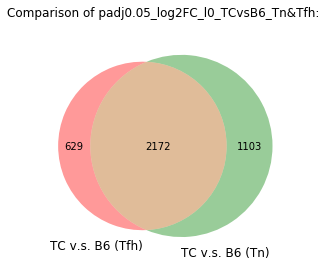

In [34]:
#Looking only in spleen
f = plt.figure()

venn2([set(gene_dict[list(gene_dict.keys())[0]]),
       set(gene_dict[list(gene_dict.keys())[1]])], #set(gene_dict[list(gene_dict.keys())[3]])
      set_labels = ("TC v.s. B6 (Tfh)", 
                    "TC v.s. B6 (Tn)"))

plt.title('Comparison of padj0.05_log2FC_l0_TCvsB6_Tn&Tfh: \n')
plt.show()

f.savefig("Comparison_of_padj0.05_log2FC_l0_TCvsB6_Tn&Tfh.pdf", bbox_inches='tight')

---------------

-------------

-------------

-------------

-------------

#### 2nd gene list

log2FC > 0; padj < 0.1; direction: higher

In [100]:
#parameter need to change
key= "TCvsB6_Tfh&Tn"
contrasts = ["TC v.s. B6 (Tfh)", "TC v.s. B6 (Tn)"] #may look up the gene_dict.keys() later
padj_th = 0.1
FC_th = 1 #1 or 1.5 or 2

In [101]:
direction = 1
log2FC_th = math.log(FC_th,2)*direction;log2FC_th

0.0

In [102]:
gene_dict = {}
res_l = []
i=0
for x in df_l:
    padj_n = [y for y in x.columns if "padj" in y]
    FC_n = [z for z in x.columns if "log2FoldChange" in z]
    gene_dict.update({"padj_" + str(padj_th) + "FC_h_" + str(FC_th) + "_" + 
                      labels[i]: x.loc[((x[padj_n[0]]<padj_th) & (x[FC_n[0]]>log2FC_th)),'Unnamed: 0'].tolist()})
    i = i+1

In [103]:
gene_dict.keys()

dict_keys(['padj_0.1FC_h_1_TCvsB6_r2_Tfh', 'padj_0.1FC_h_1_Tn_B6vsTC_r2'])

In [104]:
[str(k) + "  " +str(len(v)) for k,v in gene_dict.items()]

s = ""
for k,v in gene_dict.items():
        s +=  k + "\t"
        s += ("\t").join(v) + "\n"        

out = open('gene_lists_' + "padj_" + str(padj_th) + "FC_h_" + str(FC_th) + "_" + key + '.txt', 'w')
out.write(s)
out.close()

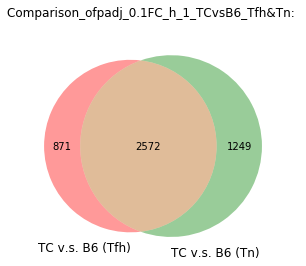

In [105]:
#Looking only in spleen
f = plt.figure()

venn2([set(gene_dict[list(gene_dict.keys())[0]]),
       set(gene_dict[list(gene_dict.keys())[1]])], #set(gene_dict[list(gene_dict.keys())[3]])
      set_labels = contrasts)

plt.title('Comparison_of' + "padj_" + str(padj_th) + "FC_h_" + str(FC_th) + "_" + key +': \n')
plt.show()

f.savefig('Comparison_of' + "padj_" + str(padj_th) + "FC_h_" + str(FC_th) + "_" + key + '.pdf', bbox_inches='tight')

-------

#### log2FC < 0 (FC < 1); padj < 0.1

In [106]:
#parameter need to change
key= "TCvsB6_Tfh&Tn"
contrasts = ["TC v.s. B6 (Tfh)", "TC v.s. B6 (Tn)"] #may look up the gene_dict.keys() later
padj_th = 0.1
FC_th = 1 #1 or 1.5 or 2

In [107]:
direction = -1

log2FC_th = math.log(FC_th,2)*direction;log2FC_th

-0.0

In [108]:
gene_dict = {}
res_l = []
i=0
for x in df_l:
    padj_n = [y for y in x.columns if "padj" in y]
    FC_n = [z for z in x.columns if "log2FoldChange" in z]
    gene_dict.update({"padj_" + str(padj_th) + "FC_l_" + str(FC_th) + "_" + 
                      labels[i]: x.loc[((x[padj_n[0]]<padj_th) & (x[FC_n[0]]<log2FC_th)),'Unnamed: 0'].tolist()})
    i = i+1

In [109]:
gene_dict.keys()

dict_keys(['padj_0.1FC_l_1_TCvsB6_r2_Tfh', 'padj_0.1FC_l_1_Tn_B6vsTC_r2'])

In [110]:
[str(k) + "  " +str(len(v)) for k,v in gene_dict.items()]

s = ""
for k,v in gene_dict.items():
        s +=  k + "\t"
        s += ("\t").join(v) + "\n"        

out = open('gene_lists_' + "padj_" + str(padj_th) + "FC_l_" + str(FC_th) + "_" + key + '.txt', 'w')
out.write(s)
out.close()

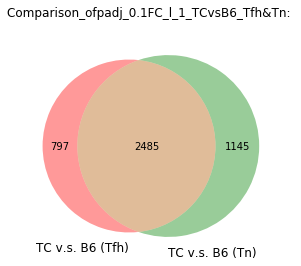

In [111]:
#Looking only in spleen
f = plt.figure()

venn2([set(gene_dict[list(gene_dict.keys())[0]]),
       set(gene_dict[list(gene_dict.keys())[1]])], #set(gene_dict[list(gene_dict.keys())[3]])
      set_labels = contrasts)

plt.title('Comparison_of' + "padj_" + str(padj_th) + "FC_l_" + str(FC_th) + "_" + key +': \n')
plt.show()

f.savefig('Comparison_of' + "padj_" + str(padj_th) + "FC_l_" + str(FC_th) + "_" + key + '.pdf', bbox_inches='tight')

------------

--------

----------

#### 3rd 2 gene list

log2FC > 0.584962501; padj < 0.05; 

In [117]:
#parameter need to change
key= "TCvsB6_Tfh&Tn"
contrasts = ["TC v.s. B6 (Tfh)", "TC v.s. B6 (Tn)"] #may look up the gene_dict.keys() later
padj_th = 0.05 # 0.05 or 0.1
FC_th = 1.5 #1 or 1.5 or 2

In [118]:
direction = 1
log2FC_th = math.log(FC_th,2)*direction;log2FC_th

0.5849625007211562

In [119]:
gene_dict = {}
res_l = []
i=0
for x in df_l:
    padj_n = [y for y in x.columns if "padj" in y]
    FC_n = [z for z in x.columns if "log2FoldChange" in z]
    gene_dict.update({"padj_" + str(padj_th) + "FC_h_" + str(FC_th) + "_" + 
                      labels[i]: x.loc[((x[padj_n[0]]<padj_th) & (x[FC_n[0]]>log2FC_th)),'Unnamed: 0'].tolist()}) #must be >
    i = i+1

In [120]:
gene_dict.keys()

dict_keys(['padj_0.05FC_h_1.5_TCvsB6_r2_Tfh', 'padj_0.05FC_h_1.5_Tn_B6vsTC_r2'])

In [121]:
[str(k) + "  " +str(len(v)) for k,v in gene_dict.items()]

s = ""
for k,v in gene_dict.items():
        s +=  k + "\t"
        s += ("\t").join(v) + "\n"        

out = open('gene_lists_' + "padj_" + str(padj_th) + "FC_h_" + str(FC_th) + "_" + key + '.txt', 'w')
out.write(s)
out.close()

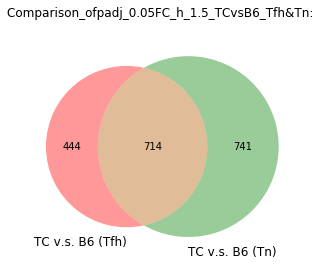

In [122]:
#Looking only in spleen
f = plt.figure()

venn2([set(gene_dict[list(gene_dict.keys())[0]]),
       set(gene_dict[list(gene_dict.keys())[1]])], #set(gene_dict[list(gene_dict.keys())[3]])
      set_labels = contrasts)

plt.title('Comparison_of' + "padj_" + str(padj_th) + "FC_h_" + str(FC_th) + "_" + key +': \n')
plt.show()

f.savefig('Comparison_of' + "padj_" + str(padj_th) + "FC_h_" + str(FC_th) + "_" + key + '.pdf', bbox_inches='tight')

-------

#### log2FC < -0.584962501 (FC < 1.5); padj < 0.05; 

In [123]:
#parameter need to change
key= "TCvsB6_Tfh&Tn"
contrasts = ["TC v.s. B6 (Tfh)", "TC v.s. B6 (Tn)"] #may look up the gene_dict.keys() later
padj_th = 0.05 # 0.05 or 0.1
FC_th = 1.5 #1 or 1.5 or 2

In [124]:
direction = -1

log2FC_th = math.log(FC_th,2)*direction;log2FC_th

-0.5849625007211562

In [125]:
gene_dict = {}
res_l = []
i=0
for x in df_l:
    padj_n = [y for y in x.columns if "padj" in y]
    FC_n = [z for z in x.columns if "log2FoldChange" in z]
    gene_dict.update({"padj_" + str(padj_th) + "FC_l_" + str(FC_th) + "_" + 
                      labels[i]: x.loc[((x[padj_n[0]]<padj_th) & (x[FC_n[0]]<log2FC_th)),'Unnamed: 0'].tolist()})
    i = i+1

In [126]:
gene_dict.keys()

dict_keys(['padj_0.05FC_l_1.5_TCvsB6_r2_Tfh', 'padj_0.05FC_l_1.5_Tn_B6vsTC_r2'])

In [127]:
[str(k) + "  " +str(len(v)) for k,v in gene_dict.items()]

s = ""
for k,v in gene_dict.items():
        s +=  k + "\t"
        s += ("\t").join(v) + "\n"        

out = open('gene_lists_' + "padj_" + str(padj_th) + "FC_l_" + str(FC_th) + "_" + key + '.txt', 'w')
out.write(s)
out.close()

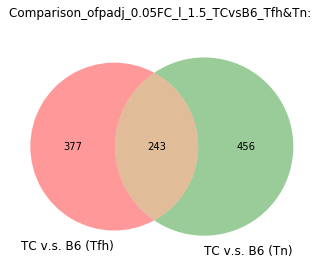

In [128]:
#Looking only in spleen
f = plt.figure()

venn2([set(gene_dict[list(gene_dict.keys())[0]]),
       set(gene_dict[list(gene_dict.keys())[1]])], #set(gene_dict[list(gene_dict.keys())[3]])
      set_labels = contrasts)

plt.title('Comparison_of' + "padj_" + str(padj_th) + "FC_l_" + str(FC_th) + "_" + key +': \n')
plt.show()

f.savefig('Comparison_of' + "padj_" + str(padj_th) + "FC_l_" + str(FC_th) + "_" + key + '.pdf', bbox_inches='tight')

-------------

-------

#### 4th gene list

log2FC > 1 (FC >2 ); padj < 0.05; 

In [131]:
#parameter need to change
key= "TCvsB6_Tfh&Tn"
contrasts = ["TC v.s. B6 (Tfh)", "TC v.s. B6 (Tn)"] #may look up the gene_dict.keys() later
padj_th = 0.05 # 0.05 or 0.1
FC_th = 2 #1 or 1.5 or 2

In [132]:
direction = 1
log2FC_th = math.log(FC_th,2)*direction;log2FC_th

1.0

In [133]:
gene_dict = {}
res_l = []
i=0
for x in df_l:
    padj_n = [y for y in x.columns if "padj" in y]
    FC_n = [z for z in x.columns if "log2FoldChange" in z]
    gene_dict.update({"padj_" + str(padj_th) + "FC_h_" + str(FC_th) + "_" + 
                      labels[i]: x.loc[((x[padj_n[0]]<padj_th) & (x[FC_n[0]]>log2FC_th)),'Unnamed: 0'].tolist()}) #must be >
    i = i+1

In [134]:
gene_dict.keys()

dict_keys(['padj_0.05FC_h_2_TCvsB6_r2_Tfh', 'padj_0.05FC_h_2_Tn_B6vsTC_r2'])

In [135]:
[str(k) + "  " +str(len(v)) for k,v in gene_dict.items()]

s = ""
for k,v in gene_dict.items():
        s +=  k + "\t"
        s += ("\t").join(v) + "\n"        

out = open('gene_lists_' + "padj_" + str(padj_th) + "FC_h_" + str(FC_th) + "_" + key + '.txt', 'w')
out.write(s)
out.close()

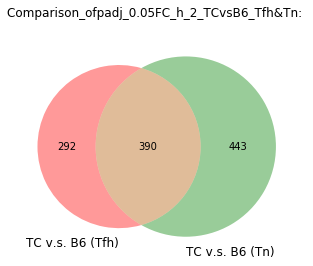

In [136]:
#Looking only in spleen
f = plt.figure()

venn2([set(gene_dict[list(gene_dict.keys())[0]]),
       set(gene_dict[list(gene_dict.keys())[1]])], #set(gene_dict[list(gene_dict.keys())[3]])
      set_labels = contrasts)

plt.title('Comparison_of' + "padj_" + str(padj_th) + "FC_h_" + str(FC_th) + "_" + key +': \n')
plt.show()

f.savefig('Comparison_of' + "padj_" + str(padj_th) + "FC_h_" + str(FC_th) + "_" + key + '.pdf', bbox_inches='tight')

-------

#### log2FC < -0.584962501 (FC < 1.5); padj < 0.05; 

In [137]:
#parameter need to change
key= "TCvsB6_Tfh&Tn"
contrasts = ["TC v.s. B6 (Tfh)", "TC v.s. B6 (Tn)"] #may look up the gene_dict.keys() later
padj_th = 0.05 # 0.05 or 0.1
FC_th = 2 #1 or 1.5 or 2

In [138]:
direction = -1

log2FC_th = math.log(FC_th,2)*direction;log2FC_th

-1.0

In [139]:
gene_dict = {}
res_l = []
i=0
for x in df_l:
    padj_n = [y for y in x.columns if "padj" in y]
    FC_n = [z for z in x.columns if "log2FoldChange" in z]
    gene_dict.update({"padj_" + str(padj_th) + "FC_l_" + str(FC_th) + "_" + 
                      labels[i]: x.loc[((x[padj_n[0]]<padj_th) & (x[FC_n[0]]<log2FC_th)),'Unnamed: 0'].tolist()})
    i = i+1

In [140]:
gene_dict.keys()

dict_keys(['padj_0.05FC_l_2_TCvsB6_r2_Tfh', 'padj_0.05FC_l_2_Tn_B6vsTC_r2'])

In [141]:
[str(k) + "  " +str(len(v)) for k,v in gene_dict.items()]

s = ""
for k,v in gene_dict.items():
        s +=  k + "\t"
        s += ("\t").join(v) + "\n"        

out = open('gene_lists_' + "padj_" + str(padj_th) + "FC_l_" + str(FC_th) + "_" + key + '.txt', 'w')
out.write(s)
out.close()

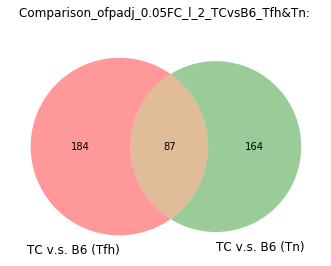

In [142]:
#Looking only in spleen
f = plt.figure()

venn2([set(gene_dict[list(gene_dict.keys())[0]]),
       set(gene_dict[list(gene_dict.keys())[1]])], #set(gene_dict[list(gene_dict.keys())[3]])
      set_labels = contrasts)

plt.title('Comparison_of' + "padj_" + str(padj_th) + "FC_l_" + str(FC_th) + "_" + key +': \n')
plt.show()

f.savefig('Comparison_of' + "padj_" + str(padj_th) + "FC_l_" + str(FC_th) + "_" + key + '.pdf', bbox_inches='tight')

-------

----------

-----------

------------